# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3. Create customer profiles
##### Create flags for the customer profiles
##### Combine the flags to create the customer profiles
##### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### 4. Export Data

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data

In [2]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
#Create data frame for the "ords_without_low_activity_customers" data set
ords_final_version = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_without_low_activity_customers.pkl'))

In [4]:
ords_final_version.shape

(30964564, 32)

In [5]:
#Create data frame for the "departments_wrangled" data set
departments_index = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
departments_index

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [7]:
ords_final_version.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   order_id                         int32  
 1   user_id                          int32  
 2   order_number                     int8   
 3   orders_day_of_week               int8   
 4   order_hour_of_day                int8   
 5   days_since_prior_order           float32
 6   product_id                       int32  
 7   add_to_cart_order                int16  
 8   reordered                        int8   
 9   product_name                     object 
 10  aisle_id                         int16  
 11  department_id                    int8   
 12  prices                           float32
 13  price_range_loc                  object 
 14  busiest_day                      object 
 15  busiest_days                     object 
 16  busiest_period_of_day            object 
 17  max_order  

# 3. Create customer profiles

### Create flags for the customer profiles

In [8]:
#Checking the minimum, maximum and mean of the "Age" and "Income" variables
ords_final_version.agg({'Age': ['min','mean', 'max'],'Income': ['min','mean', 'max']})

,Age,Income
min,18.000000,25903.000000
mean,49.468026,99675.865108
max,81.000000,593901.000000


In [9]:
#Create an Age flag
ords_final_version.loc[ords_final_version['Age'] <30, 'Age_Group'] ='Young Adult'
ords_final_version.loc[(ords_final_version['Age'] >= 30) & (ords_final_version['Age'] < 65), 'Age_Group'] = 'Middle-Aged Adult'
ords_final_version.loc[ords_final_version['Age'] >=65, 'Age_Group'] ='Senior'

In [10]:
#Check that every has been assigned a value in the 'Age_Group' column
ords_final_version['Age_Group'].value_counts(dropna=False)

Age_Group
Middle-Aged Adult    16951417
Senior                8195544
Young Adult           5817603
Name: count, dtype: int64

In [11]:
16951417+8195544+5817603

30964564

In [12]:
ords_final_version[['Age_Group','Age']].tail(40)

,Age_Group,Age
32404809,Senior,69
32404810,Young Adult,28
32404811,Young Adult,28
32404812,Young Adult,28
32404813,Young Adult,28
32404814,Young Adult,28
32404815,Young Adult,28
32404819,Young Adult,19
32404820,Young Adult,19
32404821,Young Adult,19


The Age Group flag has been successfully created in the "Age_Group" category.

In [13]:
#Create an Income_Category flag
ords_final_version['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

Create three income categories: 
    below 6.729200e+04
    between 6.729200e+04 and 1.281020e+05
    Above 1.281020e+05

In [14]:
#Create an Income_Category flag
ords_final_version.loc[ords_final_version['Income'] <6.729200e+04, 'Income_Category'] ='Low_Income'
ords_final_version.loc[(ords_final_version['Income'] >= 6.729200e+04) & (ords_final_version['Income'] < 1.281020e+05), 'Income_Category'] = 'Mid-range_Income'
ords_final_version.loc[ords_final_version['Income'] >=1.281020e+05, 'Income_Category'] ='High_Income'

In [15]:
#Check that every has been assigned a value in the 'Income_Category' column
ords_final_version['Income_Category'].value_counts(dropna=False)

Income_Category
Mid-range_Income    15482298
High_Income          7741261
Low_Income           7741005
Name: count, dtype: int64

In [16]:
15482298+7741261+7741005

30964564

In [17]:
ords_final_version[['Income_Category','Income']].tail(40)

,Income_Category,Income
32404809,Mid-range_Income,103023
32404810,Low_Income,48873
32404811,Low_Income,48873
32404812,Low_Income,48873
32404813,Low_Income,48873
32404814,Low_Income,48873
32404815,Low_Income,48873
32404819,Mid-range_Income,76190
32404820,Mid-range_Income,76190
32404821,Mid-range_Income,76190


The Income Category flag has been successfully created in the "Income_Category" category.

In [18]:
#Create a With_Children flag
ords_final_version.loc[ords_final_version['Number_of_Dependants'] <1, 'Children'] = 'Without_Children'
ords_final_version.loc[ords_final_version['Number_of_Dependants'] >=1, 'Children'] = 'With_Children'

In [19]:
ords_final_version['Number_of_Dependants'].describe()


count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_of_Dependants, dtype: float64

In [20]:
#Check that every has been assigned a value in the 'Children' column
ords_final_version['Children'].value_counts(dropna=False)

Children
With_Children       23224883
Without_Children     7739681
Name: count, dtype: int64

In [21]:
23224883+7739681

30964564

In [22]:
ords_final_version[['Children','Number_of_Dependants']].tail(40)

,Children,Number_of_Dependants
32404809,Without_Children,0
32404810,With_Children,2
32404811,With_Children,2
32404812,With_Children,2
32404813,With_Children,2
32404814,With_Children,2
32404815,With_Children,2
32404819,Without_Children,0
32404820,Without_Children,0
32404821,Without_Children,0


The With_Children flag has been successfully created in the "Children" category.

### Combine the flags to create the customer profiles

In [23]:
#Create a flag for 'Young Adult Low Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Young Adult Low Income with Children'

In [24]:
#Create a flag for 'Young Adult Low Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Young Adult Low Income without Children'

In [25]:
#Create a flag for 'Young Adult Mid-range Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Young Adult Mid-range Income with Children'

In [26]:
#Create a flag for 'Young Adult Mid-range Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Young Adult Mid-range Income without Children'

In [27]:
#Create a flag for 'Young Adult High Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Young Adult High Income with Children'

In [28]:
#Create a flag for 'Young Adult High Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Young Adult') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Young Adult High Income without Children'

In [29]:
#Create a flag for 'Middle-Aged Adult Low Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Middle-Aged Adult Low Income with Children'

In [30]:
#Create a flag for 'Middle-Aged Adult Low Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Middle-Aged Adult Low Income without Children'

In [31]:
#Create a flag for 'Middle-Aged Adult Mid-range Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Middle-Aged Adult Mid-range Income with Children'

In [32]:
#Create a flag for 'Middle-Aged Adult Mid-range Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Middle-Aged Adult Mid-range Income without Children'

In [33]:
#Create a flag for 'Middle-Aged Adult High Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Middle-Aged Adult High Income with Children'

In [34]:
#Create a flag for 'Middle-Aged Adult High Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Middle-Aged Adult') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Middle-Aged Adult High Income without Children'

In [35]:
#Create a flag for 'Senior Low Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Senior Low Income with Children'

In [36]:
#Create a flag for 'Senior Low Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'Low_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Senior Low Income without Children'

In [37]:
#Create a flag for 'Senior Mid-range Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Senior Mid-range Income with Children'

In [38]:
#Create a flag for 'Senior Mid-range Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'Mid-range_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Senior Mid-range Income without Children'

In [39]:
#Create a flag for 'Senior High Income with Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'With_Children'), 'Customer_Profile'] ='Senior High Income with Children'

In [40]:
#Create a flag for 'Senior High Income without Children'
ords_final_version.loc[(ords_final_version['Age_Group'] == 'Senior') & (ords_final_version['Income_Category'] == 'High_Income') & (ords_final_version['Children'] == 'Without_Children'), 'Customer_Profile'] ='Senior High Income without Children'

In [41]:
# Check the counts of each flag
ords_final_version['Customer_Profile'].value_counts(dropna=False)

Customer_Profile
Middle-Aged Adult Mid-range Income with Children       6315180
Middle-Aged Adult High Income with Children            3376232
Senior Mid-range Income with Children                  3003430
Middle-Aged Adult Low Income with Children             2989900
Senior High Income with Children                       2366940
Young Adult Mid-range Income with Children             2298657
Middle-Aged Adult Mid-range Income without Children    2097297
Young Adult Low Income with Children                   2017630
Middle-Aged Adult High Income without Children         1159510
Middle-Aged Adult Low Income without Children          1013298
Senior Mid-range Income without Children               1000466
Senior Low Income with Children                         803216
Senior High Income without Children                     770597
Young Adult Mid-range Income without Children           767268
Young Adult Low Income without Children                 666066
Senior Low Income without Children    

In [42]:
#Checking that the number of rows adds up to 30964564
6315180+3376232+3003430+2989900+2366940+2298657+2097297+2017630+1159510+1013298+1000466+803216+770597+767268+666066+250895+53698+14284

30964564

In [43]:
ords_final_version['Customer_Profile'].head(10)

0    Middle-Aged Adult Low Income with Children
1    Middle-Aged Adult Low Income with Children
2    Middle-Aged Adult Low Income with Children
3    Middle-Aged Adult Low Income with Children
4    Middle-Aged Adult Low Income with Children
5    Middle-Aged Adult Low Income with Children
6    Middle-Aged Adult Low Income with Children
7    Middle-Aged Adult Low Income with Children
8    Middle-Aged Adult Low Income with Children
9    Middle-Aged Adult Low Income with Children
Name: Customer_Profile, dtype: object

ords_prods_merge.groupby(['loyalty_flag']).user_id.nunique()

In [44]:
subset_bar_chart = ords_final_version.groupby(['Customer_Profile']).user_id.nunique()

In [45]:
subset_bar_chart.head()

Customer_Profile
Middle-Aged Adult High Income with Children         16712
Middle-Aged Adult High Income without Children       5586
Middle-Aged Adult Low Income with Children          18901
Middle-Aged Adult Low Income without Children        6360
Middle-Aged Adult Mid-range Income with Children    31070
Name: user_id, dtype: int64

In [ ]:
#Number of unique customers
16712+5586+18901+6360+31070

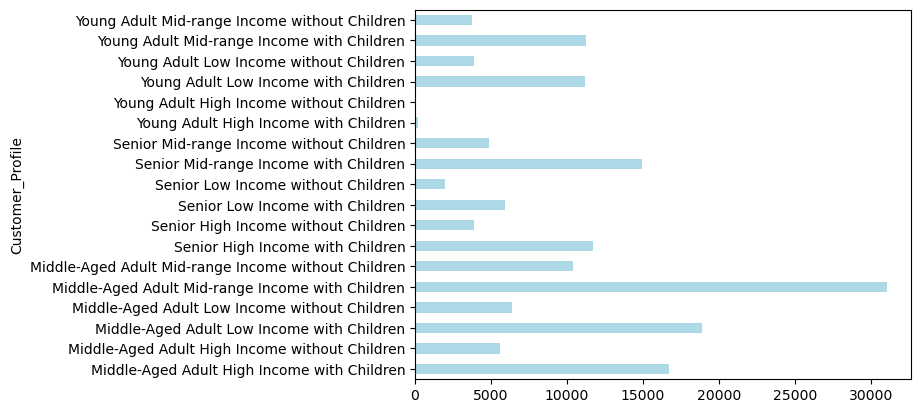

In [46]:
#Creating a bar chart to show the distribution of the customer profiles
bar_customer_profiles= subset_bar_chart.plot.barh(color='lightblue')

One profile of customer stands up : the Middle-Aged Adult, Mid-range Income with Children.
We notice that Young Adults with a High Income (with and without children) are almost non-existant customer categories. This could be due to the fact that customers who ordered less than 5 times have been removed from the data set, but there is no evidence of this. The excluded subset would have to be analysed for this hypothesis to be confirmed or denied.

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
#Calculating the average, minimum and maximum expenditure on a customer-profile level
ords_final_version.groupby(['Customer_Profile']).agg({'prices':['mean', 'min', 'max']})

prices           
                                                        mean  min   max
Customer_Profile                                                       
Middle-Aged Adult High Income with Children         7.952323  1.0  25.0
Middle-Aged Adult High Income without Children      7.935651  1.0  25.0
Middle-Aged Adult Low Income with Children          7.263187  1.0  25.0
Middle-Aged Adult Low Income without Children       7.263700  1.0  25.0
Middle-Aged Adult Mid-range Income with Children    7.954041  1.0  25.0
Middle-Aged Adult Mid-range Income without Chil...  7.963840  1.0  25.0
Senior High Income with Children                    7.961564  1.0  25.0
Senior High Income without Children                 7.946569  1.0  25.0
Senior Low Income with Children                     6.708251  1.0  25.0
Senior Low Income without Children                  6.721591  1.0  25.0
Senior Mid-range Income with Children               7.954398  1.0  25.0
Senior Mid-range Income without Children            7.961605  1.0  25.0
Young Adult High Income with Children               7.792324  1.0  25.0
Young Adult High Income without Children            7.802744  1.0  25.0
Young Adult Low Income with Children                7.589708  1.0  25.0
Young Adult Low Income without Children             7.579275  1.0  25.0
Young Adult Mid-range Income with Children          7.958114  1.0  25.0
Young Adult Mid-range Income without Children       7.936481  1.0  25.0

In [48]:
#Calculating the average, minimum and maximum usage frequency on a customer-profile level
ords_final_version.groupby(['Customer_Profile']).agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order  \
                                                                     mean   
Customer_Profile                                                            
Middle-Aged Adult High Income with Children                     10.844093   
Middle-Aged Adult High Income without Children                  10.656354   
Middle-Aged Adult Low Income with Children                      10.979881   
Middle-Aged Adult Low Income without Children                   10.859492   
Middle-Aged Adult Mid-range Income with Children                10.765476   
Middle-Aged Adult Mid-range Income without Chil...              10.769627   
Senior High Income with Children                                10.707685   
Senior High Income without Children                             10.738605   
Senior Low Income with Children                                 11.028144   
Senior Low Income without Children                              11.319335   
Senior Mid-range Income with Children                           10.810763   
Senior Mid-range Income without Children                        10.654395   
Young Adult High Income with Children                            9.900815   
Young Adult High Income without Children                        10.387936   
Young Adult Low Income with Children                            10.889860   
Young Adult Low Income without Children                         11.045735   
Young Adult Mid-range Income with Children                      10.706569   
Young Adult Mid-range Income without Children                   10.818605   

                                                               
                                                    min   max  
Customer_Profile                                               
Middle-Aged Adult High Income with Children         0.0  30.0  
Middle-Aged Adult High Income without Children      0.0  30.0  
Middle-Aged Adult Low Income with Children          0.0  30.0  
Middle-Aged Adult Low Income without Children       0.0  30.0  
Middle-Aged Adult Mid-range Income with Children    0.0  30.0  
Middle-Aged Adult Mid-range Income without Chil...  0.0  30.0  
Senior High Income with Children                    0.0  30.0  
Senior High Income without Children                 0.0  30.0  
Senior Low Income with Children                     0.0  30.0  
Senior Low Income without Children                  0.0  30.0  
Senior Mid-range Income with Children               0.0  30.0  
Senior Mid-range Income without Children            0.0  30.0  
Young Adult High Income with Children               0.0  30.0  
Young Adult High Income without Children            0.0  30.0  
Young Adult Low Income with Children                0.0  30.0  
Young Adult Low Income without Children             0.0  30.0  
Young Adult Mid-range Income with Children          0.0  30.0  
Young Adult Mid-range Income without Children       0.0  30.0

In [51]:
ords_final_version.shape

(30964564, 36)

# 4. Export Data

In [ ]:
#Export the subset as a pickle file
ords_final_version.to_pickle(os.path.join(path, '02 Data','Prepared Data','ords_final_version.pkl'))